In [1]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2023-11-02 17:50:31.963425: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
import pyarrow as pa
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from source import data_import

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [4]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

import keras 
from keras.models import Sequential # intitialize the ANN
from keras.layers import Dense, Activation, Dropout 

In [5]:
# load data
df_pp = data_import.load_pyarrow(file_name="feature_extracted")
df_pp.shape

/Users/anabroggini/Documents/bootcamp/ai2/source/../data/feature_extracted.arrow was loaded.


(1138, 63)

In [6]:
df_pp.head()

,seizure_id,segment_id,is_seizure,F4-C4_mean,F4-C4_std,F4-C4_var,F4-C4_delta,F4-C4_theta,F4-C4_gamma,F3-C3_mean,...,FP1-F3_var,FP1-F3_delta,FP1-F3_theta,FP1-F3_gamma,CZ-PZ_mean,CZ-PZ_std,CZ-PZ_var,CZ-PZ_delta,CZ-PZ_theta,CZ-PZ_gamma
0,0,1,False,0.642823,25.278278,638.991344,99.724544,33.651173,0.131576,-0.136380,...,704.741392,115.680103,29.233559,0.343249,0.758870,35.447713,1256.540374,194.364620,76.886992,0.174189
1,0,2,False,0.459926,24.908361,620.426452,80.467433,30.739370,0.113581,0.607864,...,654.580741,98.999296,24.519002,0.363930,0.040398,33.861154,1146.577756,187.417290,34.401955,0.181605
2,0,3,False,-0.336786,25.078313,628.921793,97.815139,19.120020,0.108965,0.020483,...,505.928076,76.273119,21.891098,0.347473,0.139786,30.472674,928.583879,117.606520,31.998680,0.155509
3,0,4,False,0.571550,23.796227,566.260437,78.057846,22.859691,0.112154,0.170771,...,623.521637,111.418632,24.584840,0.326450,0.347514,30.803236,948.839359,158.377845,31.605055,0.181355
4,0,5,False,-0.156618,28.030262,785.695596,102.786435,31.697164,0.123064,0.019398,...,838.658633,115.905093,37.751880,0.323275,-0.032786,39.120852,1530.441051,215.122132,60.283108,0.170928


In [17]:
# Split data into train and test set for RNN

#train_test_split_ratio = int(len(df)*0.8)
#train_data, test_data = df[:train_test_split_ratio], df[train_test_split_ratio:]

In [22]:
# X_train = train_data.loc[:,channels]
# y_train = train_data['is_seizure']
# X_test = test_data.loc[:,channels]
# y_test = test_data['is_seizure']

In [31]:
X_train.shape

(23274086, 10)

In [6]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets with stratification
model_df= df_pp
y = model_df["is_seizure"]
X = model_df.drop(columns=["is_seizure"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [14]:
X_train.shape[1]

62

In [7]:
# ANN simple
model = keras.Sequential()
model.add(layers.Input(shape=(62,)))  # Input layer with 2 features
model.add(layers.Dense(32, activation='relu'))  # Hidden layer with 32 units and ReLU activation
model.add(layers.Dense(1, activation='sigmoid'))  # Output layer with 1 unit and sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
#history=model.fit(X_train, y_train, epochs=10, batch_size=32)
history = model.fit(X, y, epochs=300, batch_size=32, validation_split=0.2)

# Make predictions
predictions = model.predict(X_train)

# Evaluate the model (you can use a separate test dataset)
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

Epoch 1/300
29/29 [==============================] - 1s 11ms/step - loss: 579.6629 - accuracy: 0.3692 - val_loss: 225.7216 - val_accuracy: 0.4211
Epoch 2/300
29/29 [==============================] - 0s 3ms/step - loss: 275.5347 - accuracy: 0.5462 - val_loss: 188.3103 - val_accuracy: 0.5219
Epoch 3/300
29/29 [==============================] - 0s 3ms/step - loss: 177.1813 - accuracy: 0.5912 - val_loss: 204.2231 - val_accuracy: 0.6886
Epoch 4/300
29/29 [==============================] - 0s 3ms/step - loss: 155.2560 - accuracy: 0.6055 - val_loss: 148.1499 - val_accuracy: 0.6579
Epoch 5/300
29/29 [==============================] - 0s 3ms/step - loss: 110.9818 - accuracy: 0.6473 - val_loss: 128.8677 - val_accuracy: 0.7500
Epoch 6/300
29/29 [==============================] - 0s 3ms/step - loss: 84.7030 - accuracy: 0.7088 - val_loss: 109.4342 - val_accuracy: 0.8289
Epoch 7/300
29/29 [==============================] - 0s 3ms/step - loss: 63.2119 - accuracy: 0.7846 - val_loss: 96.7914 - val_accu

In [12]:
# Plotting function for MSE
def plot_metric(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model')
    plt.ylabel('accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

In [11]:
history.history[]

{'loss': [579.6629028320312,
  275.53466796875,
  177.1812744140625,
  155.2559814453125,
  110.98179626464844,
  84.70303344726562,
  63.21189880371094,
  47.65287780761719,
  37.9083366394043,
  35.302207946777344,
  27.90735626220703,
  24.90926170349121,
  22.518247604370117,
  21.65345573425293,
  16.713823318481445,
  15.671333312988281,
  17.584762573242188,
  15.40098762512207,
  12.266634941101074,
  11.664260864257812,
  10.071359634399414,
  10.016022682189941,
  10.474397659301758,
  10.428940773010254,
  9.404399871826172,
  9.638036727905273,
  6.727482318878174,
  6.563449859619141,
  6.256752014160156,
  6.376680374145508,
  8.051247596740723,
  7.431473255157471,
  7.1786322593688965,
  7.898382663726807,
  11.846738815307617,
  10.68056869506836,
  5.4082536697387695,
  5.300194263458252,
  5.664985179901123,
  4.488558769226074,
  4.003286361694336,
  4.426395893096924,
  4.725111484527588,
  4.6446452140808105,
  3.9712541103363037,
  7.169210433959961,
  5.88997459

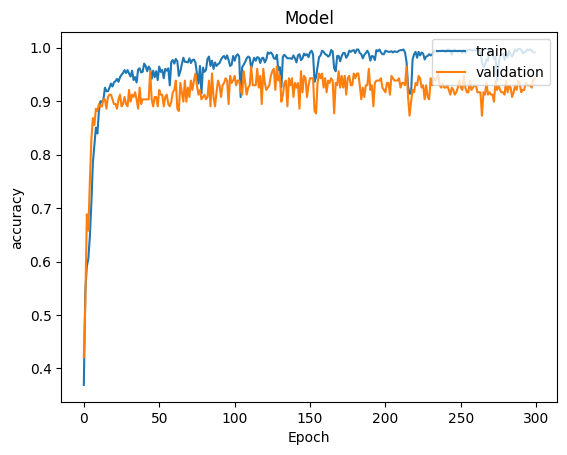

In [13]:
plot_metric(history)

In [16]:
# Plotting function for loss
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title('Model Loss')
    #plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

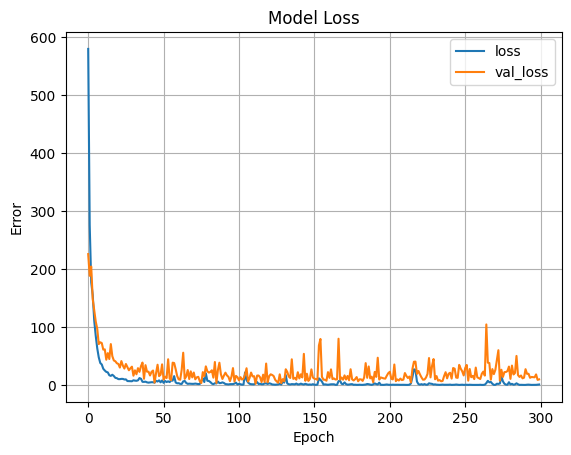

In [17]:
plot_loss(history)

In [25]:
X_train.head()

,seizure_id,segment_id,F4-C4_mean,F4-C4_std,F4-C4_var,F4-C4_delta,F4-C4_theta,F4-C4_gamma,F3-C3_mean,F3-C3_std,...,FP1-F3_var,FP1-F3_delta,FP1-F3_theta,FP1-F3_gamma,CZ-PZ_mean,CZ-PZ_std,CZ-PZ_var,CZ-PZ_delta,CZ-PZ_theta,CZ-PZ_gamma
443,25,1,0.974963,135.003426,18225.924931,2797.734571,1957.126647,1.775834,-0.661827,126.268013,...,15380.144604,2100.357990,1733.892792,3.914420,0.865415,94.802843,8987.578971,1028.188675,1162.317346,0.577755
802,41,23,-0.205126,58.548470,3427.923365,411.614580,194.853022,5.660160,0.378357,91.261712,...,6873.815185,956.843979,658.790549,4.424090,0.777484,86.584393,7496.857152,660.079314,677.181647,1.961629
687,36,5,1.005757,47.401366,2246.889471,326.336836,99.152996,0.654710,1.907424,36.907004,...,1159.953288,107.847647,51.422094,0.521944,-1.224023,28.466164,810.322468,68.533874,55.964939,0.404406
984,51,5,0.331929,24.705349,610.354277,93.141078,19.014501,0.527946,0.211552,27.949830,...,1589.581269,214.778474,23.954979,0.635606,0.409745,26.426466,698.358121,122.557711,20.918492,0.234341
1132,59,13,0.539940,33.038943,1091.571736,99.472771,38.743466,6.533105,0.342192,33.253709,...,2812.827758,388.453799,57.652633,7.607802,0.252749,30.347643,920.979444,161.602936,24.461690,0.462372


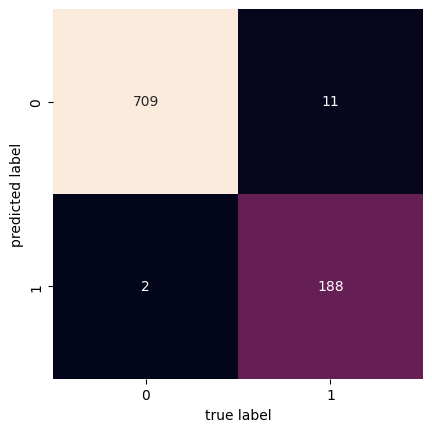

In [26]:
# Plotting the confusing matrix
mat = confusion_matrix(y_train, predictions.round())
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [27]:
predictions_test = model.predict(X_test)


8/8 [==============================] - 0s 1ms/step


In [32]:
# Generate a classification report with various metrics
report = classification_report(y_test, predictions_test.round())
print("Classification Report:")
print(report)
      

Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.99      0.99       178
        True       0.96      0.96      0.96        50

    accuracy                           0.98       228
   macro avg       0.97      0.97      0.97       228
weighted avg       0.98      0.98      0.98       228



In [30]:
#RNN - work in progress
# Define a sequential model
model = keras.Sequential()

# Add an input layer with an input shape of (time_steps, input_features)
model.add(layers.InputLayer(input_shape=(X_train.shape[0], 10)))

# Add a SimpleRNN layer with 32 units (neurons)
model.add(layers.SimpleRNN(32, activation='tanh'))

# Add the output layer with 1 neuron and sigmoid activation for binary classification
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model with binary cross-entropy loss for binary classification
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Assuming X_train and y_train are your training data
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10


ValueError: in user code:

    File "/Users/anabroggini/Documents/bootcamp/ai2/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "/Users/anabroggini/Documents/bootcamp/ai2/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/anabroggini/Documents/bootcamp/ai2/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "/Users/anabroggini/Documents/bootcamp/ai2/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1126, in train_step
        y_pred = self(x, training=True)
    File "/Users/anabroggini/Documents/bootcamp/ai2/.venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/anabroggini/Documents/bootcamp/ai2/.venv/lib/python3.11/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 23274086, 10), found shape=(None, 10)
